In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
import tensorflow as tf

In [6]:
print('Loanding data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 20000)

Loanding data...


In [7]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

In [9]:
a = tf.Variable(1, name="a")
b = tf.Variable(2, name="b")
f = a+b
init = tf.global_variables_initializer()
with tf.Session() as s:
    init.run()
    print(f.eval())

3


In [10]:
#matrix multiplication
#output of previous layer and matrix multiply
#Make sure your features are normalized

In [2]:
mnist = tf.keras.datasets.mnist
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow import keras

In [19]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [20]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /=255
test_images /=255

In [21]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)



[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


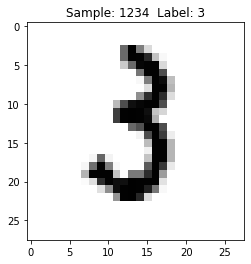

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num,label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()
display_sample(1234)

In [25]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dense(10, activation = 'softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer = RMSprop(),
             metrics = ['accuracy'])

In [30]:
histroy = model.fit(train_images,train_labels,
                   batch_size=100,
                   epochs=10,
                   verbose=2,
                   validation_data = (test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 6s - loss: 0.2422 - acc: 0.9294 - val_loss: 0.1182 - val_acc: 0.9642
Epoch 2/10
 - 7s - loss: 0.0965 - acc: 0.9709 - val_loss: 0.0860 - val_acc: 0.9742
Epoch 3/10
 - 6s - loss: 0.0639 - acc: 0.9804 - val_loss: 0.0744 - val_acc: 0.9788
Epoch 4/10
 - 9s - loss: 0.0470 - acc: 0.9857 - val_loss: 0.0675 - val_acc: 0.9806
Epoch 5/10
 - 6s - loss: 0.0353 - acc: 0.9897 - val_loss: 0.0880 - val_acc: 0.9739
Epoch 6/10
 - 7s - loss: 0.0271 - acc: 0.9920 - val_loss: 0.0668 - val_acc: 0.9810
Epoch 7/10
 - 7s - loss: 0.0205 - acc: 0.9939 - val_loss: 0.0772 - val_acc: 0.9780
Epoch 8/10
 - 8s - loss: 0.0158 - acc: 0.9953 - val_loss: 0.0699 - val_acc: 0.9813
Epoch 9/10
 - 8s - loss: 0.0121 - acc: 0.9961 - val_loss: 0.0729 - val_acc: 0.9819
Epoch 10/10
 - 8s - loss: 0.0098 - acc: 0.9971 - val_loss: 0.0750 - val_acc: 0.9818


In [31]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.07502691272408438
Test accuracy 0.9818


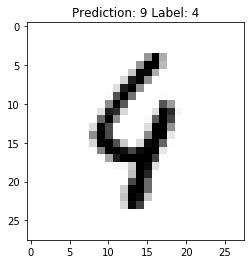

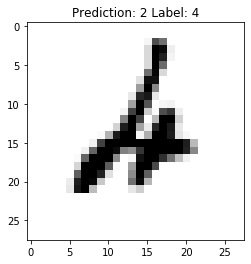

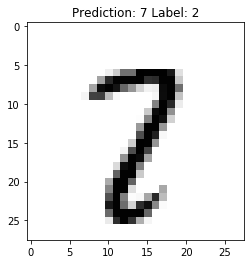

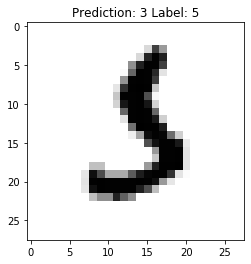

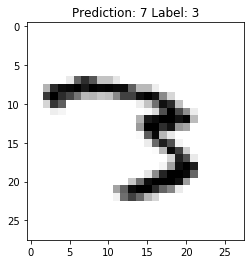

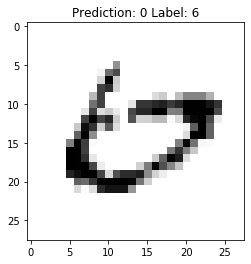

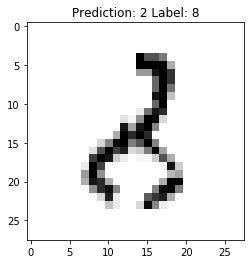

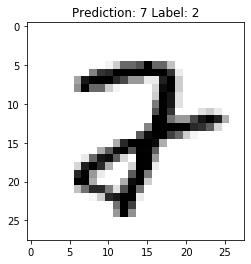

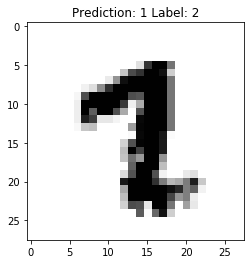

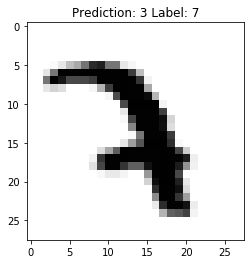

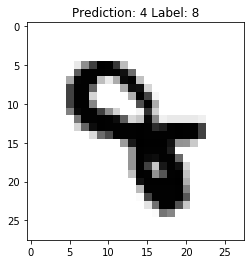

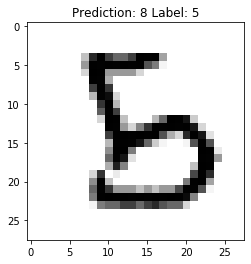

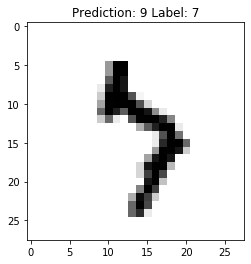

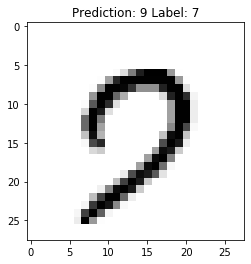

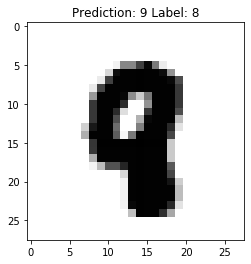

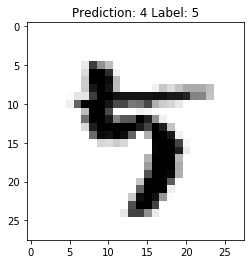

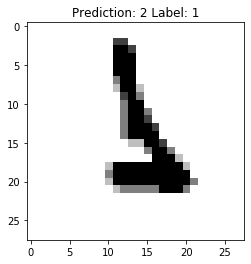

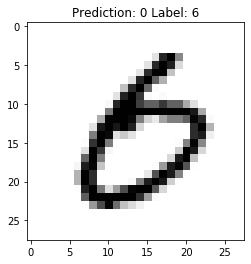

In [33]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

In [1]:
import pandas as pd
feature_names =  ['party','handicapped-infants', 'water-project-cost-sharing', 
                    'adoption-of-the-budget-resolution', 'physician-fee-freeze',
                    'el-salvador-aid', 'religious-groups-in-schools',
                    'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
                    'mx-missle', 'immigration', 'synfuels-corporation-cutback',
                    'education-spending', 'superfund-right-to-sue', 'crime',
                    'duty-free-exports', 'export-administration-act-south-africa']

voting_data = pd.read_csv(r'C:\Users\drobey\Documents\Coding\DataScience - Python\Neural Networks\DeepLearning\house-votes-84.data.txt', na_values=['?'], 
                          names = feature_names)
voting_data.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [2]:
voting_data.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [3]:
#Drop any rows with missing data
voting_data.dropna(inplace=True)
voting_data.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,n,y,n,y,y,y,y,n,y,n,n,y,y,n,y
freq,124,136,125,123,119,128,149,124,119,119,128,152,124,127,149,146,189


In [4]:
voting_data.replace(('y','n',),(1,0), inplace= True)
voting_data.replace(('democrat','republican'), (1,0), inplace=True)


In [5]:
voting_data.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,1,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [6]:
all_features = voting_data[feature_names].values
all_classes = voting_data['party'].values

In [11]:
model = Sequential()
model.add(Dense(1000, activation = 'relu', input_dim = 17))
model.add(Dropout(rate = 0.5))
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(rate = .5))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop',
             metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              18000     
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 1,020,001
Trainable params: 1,020,001
Non-trainable params: 0
_________________________________________________________________


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_features,all_classes,test_size=.2,random_state=0)

histroy = model.fit(x_train,y_train,
                   batch_size=10,
                   epochs=10,
                   verbose=2,
                   validation_data = (x_test,y_test))

Train on 185 samples, validate on 47 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 2s - loss: 0.2547 - acc: 0.8973 - val_loss: 0.0705 - val_acc: 0.9574
Epoch 2/10
 - 0s - loss: 0.0358 - acc: 0.9892 - val_loss: 0.0230 - val_acc: 0.9787
Epoch 3/10
 - 0s - loss: 0.0125 - acc: 0.9946 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 5/10
 - 0s - loss: 5.4779e-04 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 6/10
 - 0s - loss: 4.1438e-04 - acc: 1.0000 - val_loss: 6.3689e-04 - val_acc: 1.0000
Epoch 7/10
 - 0s - loss: 1.2540e-04 - acc: 1.0000 - val_loss: 5.5606e-04 - val_acc: 1.0000
Epoch 8/10
 - 0s - loss: 5.3540e-05 - acc: 1.0000 - val_loss: 2.3913e-04 - val_acc: 1.0000
Epoch 9/10
 - 0s - loss: 1.9932e-05 - acc: 1.0000 - val_loss: 2.3563e-04 - val_acc: 1.0000
Epoch 10/10
 - 0s - loss: 7.6796e-06 - acc: 1.0000 - val_loss: 5.2911e-05 - val_acc: 1.0000


In [1]:
import pandas as pd
Loans_df = pd.read_csv(r"C:\Users\drobey\Documents\Coding\Power BI\Kiva\kiva_loans.csv")
Loans_df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [14]:
#Convolutional Neural Networks
#Image analysis usually. Feature location invariant. Looking
#for a pattern or feature within data that we don't know what it is
#inspired by biology of visual Cortex
#Local receptive fields are groups of neurons that only respond to what your eyes see (subsampling)
#These subsamples overlap each other to cover the entire visual field (convolution)
#Convolution - break up this data into chunks and analyze them individually. 
#Assemble bigger picutre higher up in the chain


In [15]:
#CNN W Keras
#Source data must be of appropriate dimentions (width, length, color channels)
#Conv2D layer ype does the actual convolution on a 2D image (Conv1D and 3D also available - doesn't haev to be image data)
#MaxPooling2D layers can be used to reduce a 2D layer down by taking the maximum value in a given block
#Flatten layers will convery the 2D layer to a 1D layer for passing into a flat hidden layer of neurons
#Typical usage:
#Conv2D-> MaxPooling2D -> Dropout -> Flatten -> Dense -> Dropout -> Softmax

In [16]:
#Specialized CNN Architectures --> Defines specific arrangement of layers, padding, and hyper parameters
#LeNet-5 --> Good for handwriting recognition
#AlexNet --> Image classification, deeper than LeNet
#GoogLeNet -->Even deeper, but with better performaance (Introduced Inception Modules, ie. groups of convolution layers)
#ResNet (Residual Network)--> Even Deeper, maintains performance via skip connections

In [17]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [3]:
from tensorflow.keras.layers import Dense, Embedding, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import imdb
import tensorflow as tf

In [22]:
#We don't need to reshape the data like we did before - instead its LxWxColor Channel bc thats what Conv2D uses
#In this case, as its black and white( grey scale) only need 1 channel
from tensorflow.keras import backend as K
if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1,28,28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28,28,1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /=255
test_images /=255

        

In [24]:
train_labels = tf.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tf.keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


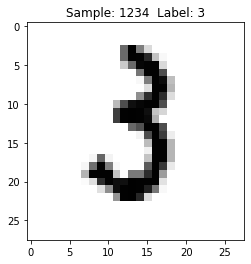

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num,label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()
display_sample(1234)

In [26]:
#Set up CNN
model = Sequential()
#Our Convelutional 2D layer will have 32 windows (32 regional fields that it will use to sample the image with)
#Each sample will be a 3x3 kernel size
#input shaep = input shape is refereing to the shape we made up above
model.add(Conv2D(32, kernel_size = (3,3),
                activation = 'relu',
                input_shape = input_shape))
#64 3x3 Kernels. 64 regional fields
model.add(Conv2D(64, (3,3),activation ='relu'))
#Reduce by taking the Max of each 2x2 block
#Take a 2x2 pool size and for each 2x2 pixel block we are going to reduce it down to a single pixel (Max pixel within that group)
#Shink down dit more manageable
model.add(MaxPata to make ooling2D(pool_size=(2,2)))
#Dropout to avoid overfitting
model.add(Dropout(0.25))
#Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128,activation = 'relu'))
#Another Dropout
model.add(Dropout(0.5))
#Final categorization for 0-9 with softmax
model.add(Dense(10,activation='softmax'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [30]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
#This is the appropriate loss function for a multiple category classficiation problem

In [ ]:
history = model.fit(train_images, train_labels,
                   batch_size = 12,
                   epochs = 10,
                    verbose = 2,
                    validation_data = (test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 313961s - loss: 0.1758 - acc: 0.9474 - val_loss: 0.0440 - val_acc: 0.9853
Epoch 2/10
 - 891s - loss: 0.0825 - acc: 0.9759 - val_loss: 0.0387 - val_acc: 0.9884
Epoch 3/10


In [1]:
#Reccurent Neural Networks
#For sequences in time - Time series data
    #Predict future based on past behavior
    #Web Logs, sensor logs, stock trades etc.
#Data that consists of sequences of arbitrary length
    #Machine translation, image captions, machine generated music
#Training RNNs -> Backpropagation through time
    #Every one of the time steps ends up looking like another layer
    #Ends up looking like a really really deep neural network
    #Can limit backpropagation to a limited number of time steps (truncated backpropogation through time)
#State from earlier time steps get diluted over time (can be a problem, for example, when learning sentence structures)
    #One way to counteract this is through the LTSM Cell (Long Short term memory cell)
        #Maintains separate short-term and long-term states, used if you don't want to give preferetial treament to the most recent step
    #GRU Cell - Gated Restriced Unit (simplified LSTM Cell that performs about as well)
#Training is very hard, resource intensive, and sensitive to topologies


In [5]:
print('Loanding data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 20000)
#giving us 20000 of the most popular unique words for our data set

Loanding data...


In [6]:
x_train[0]
#the words have already been coverted to integer-based indicies, the actual letters don't really matter


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

In [7]:
y_train[0]
#1 means they liked it (positive)
#0 means they didn't like it

1

In [9]:
x_train = sequence.pad_sequences(x_train, maxlen = 80)
x_test = sequence.pad_sequences(x_test, maxlen = 80)
#Breakout training and test data, make sure it has a limit of 80 words
#Reason is bc RNNs are very intensive, have an upperbound on how many time steps we backpropogate to
#only going to look at the first 80 words in each review and only look at that (truncate the backpropogation)


In [11]:
#Build up topology of network one step at a time
model = Sequential()
#Embedding layer
#Convert input data of words up to the first 80 words into dense vectors of some fixed size(20,000 words) and then funnel that into 128 hidden neurons
model.add(Embedding(20000,128))
#Build reccurent neural network, 128 recurrent neurons with a dropout of 20%
model.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2))
#Boil down to single output neuron with sigmoid activation function (bc we are dealing with binary classification)
model.add(Dense(1, activation = "sigmoid"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
#Tell keras how to optimize neural network and how to train it
model.compile(loss = 'binary_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=32,
         epochs=15,verbose=2,
         validation_data=(x_test, y_test))

In [ ]:
score, acc = model.evaluate(x_test, y_test,
                           batch_size = 32,
                           verbose = 2)
print("Test score", score)
print("Test accuracy: ", acc)

Transfer Learning

Re-using trained models - Using pretrained models for use
-For many Common probelms you can import pretrained models and jsut use them
-Use them as-is or tune them for your appilcation (Model Zoos) popular one is Caffe Model Zoo

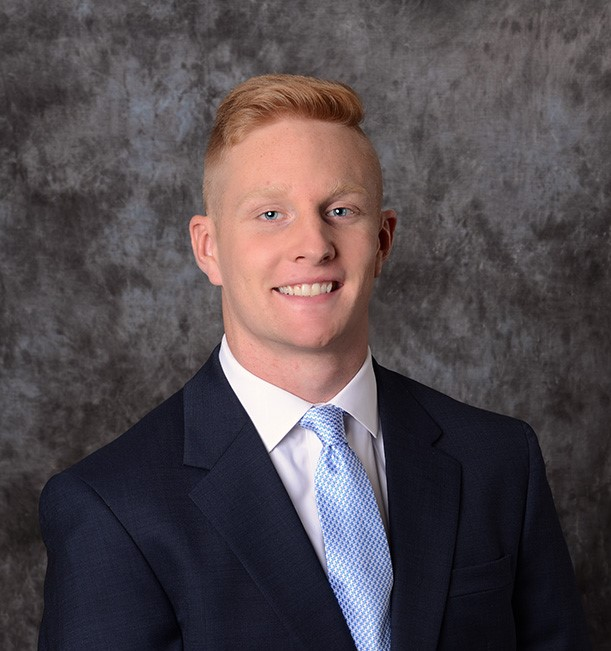

In [4]:
from IPython.display import Image
Image(filename=r'C:\Users\drobey\Pictures\DSC_6795p.jpg')

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from IPython.display import display 
from PIL import Image as im

In [11]:
img_path = r'C:\Users\drobey\Pictures\DSC_6795p.jpg'
#scaled down to 224x224 because that is what the model accepts
img = image.load_img(img_path,target_size = (224,224))
#convert to a numpy array with these two lines of code
#Kind of a black box - not always ideal
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [7]:
model = ResNet50(weights='imagenet')

W0723 07:55:27.175959 18252 deprecation.py:506] From c:\users\drobey\appdata\local\continuum\miniconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


102858752/102853048 [==============================] - 8s 0us/step


In [8]:
preds = model.predict(x)
#decode the results into a list of tuples (class, description, probability)
#(one such lsit for each sample in the batch)
print('Predicted: ', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 1us/step
Predicted:  [('n04350905', 'suit', 0.9678946), ('n04591157', 'Windsor_tie', 0.026597729), ('n10148035', 'groom', 0.002494291)]


In [12]:
def classify(img_path):
    display(Image(filename=img_path))
    
    img = image.load_img(img_path, target_size=(224,224))
    #convert to numpy array and preprocess it
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    x = preprocess_input(x)
    
    preds = model.predict(x)
    print('Predicted: ', decode_predictions(preds, top = 3)[0])

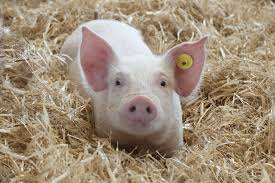

Predicted:  [('n02395406', 'hog', 0.9956535), ('n02396427', 'wild_boar', 0.0028647813), ('n03935335', 'piggy_bank', 0.00045100827)]


In [13]:
classify(r'C:\Users\drobey\Pictures\pig.jpg')

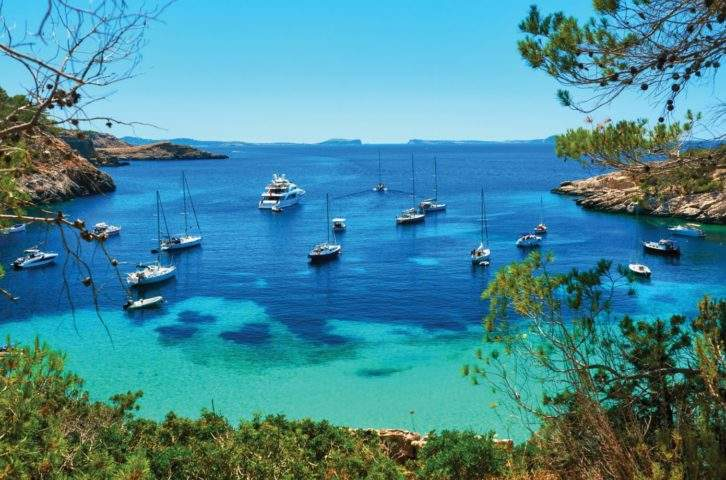

Predicted:  [('n09428293', 'seashore', 0.31566352), ('n09332890', 'lakeside', 0.2860553), ('n09256479', 'coral_reef', 0.10364644)]


In [14]:
classify(r'C:\Users\drobey\Pictures\boats_on_water.jpg')